In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image, ImageOps
import sys
import re
from sklearn.model_selection import GroupShuffleSplit
import os
from tqdm import tqdm

pd.set_option('display.max_rows', 500)

In [9]:
df = pd.read_csv('full_data_classification.csv')
df

,Unnamed: 0,masked_img_name,clothing_type,fabric,pattern,segm_name,img_id
0,0,MEN-Denim-id_00000080-01_7_additional_segm_1.png,1,1,3,MEN-Denim-id_00000080-01_7_additional_segm.png,MEN-Denim-id_00000080
1,1,MEN-Denim-id_00000080-01_7_additional_segm_4.png,4,1,4,MEN-Denim-id_00000080-01_7_additional_segm.png,MEN-Denim-id_00000080
2,2,MEN-Denim-id_00000089-01_7_additional_segm_1.png,1,1,3,MEN-Denim-id_00000089-01_7_additional_segm.png,MEN-Denim-id_00000089
3,3,MEN-Denim-id_00000089-01_7_additional_segm_4.png,4,1,3,MEN-Denim-id_00000089-01_7_additional_segm.png,MEN-Denim-id_00000089
4,4,MEN-Denim-id_00000089-02_7_additional_segm_1.png,1,1,2,MEN-Denim-id_00000089-02_7_additional_segm.png,MEN-Denim-id_00000089
...,...,...,...,...,...,...,...
24851,25076,WOMEN-Tees_Tanks-id_00007970-01_7_additional_s...,4,0,3,WOMEN-Tees_Tanks-id_00007970-01_7_additional_s...,WOMEN-Tees_Tanks-id_00007970
24852,25077,WOMEN-Tees_Tanks-id_00007976-01_4_full_segm_1.png,1,1,6,WOMEN-Tees_Tanks-id_00007976-01_4_full_segm.png,WOMEN-Tees_Tanks-id_00007976
24853,25078,WOMEN-Tees_Tanks-id_00007976-01_4_full_segm_4.png,4,0,3,WOMEN-Tees_Tanks-id_00007976-01_4_full_segm.png,WOMEN-Tees_Tanks-id_00007976
24854,25079,WOMEN-Tees_Tanks-id_00007979-03_4_full_segm_6.png,6,1,3,WOMEN-Tees_Tanks-id_00007979-03_4_full_segm.png,WOMEN-Tees_Tanks-id_00007979


In [10]:
df['clothing_type'].value_counts()

clothing_type
1    9002
4    8308
5    2854
2    2830
3    1126
6     736
Name: count, dtype: int64

In [7]:
df['fabric'].value_counts()

fabric
1    15623
0     4907
4     1909
3     1135
2      718
5      564
Name: count, dtype: int64

In [8]:
df['pattern'].value_counts()

pattern
3    16487
1     4612
2      890
5      724
0      714
7      557
4      523
6      349
Name: count, dtype: int64

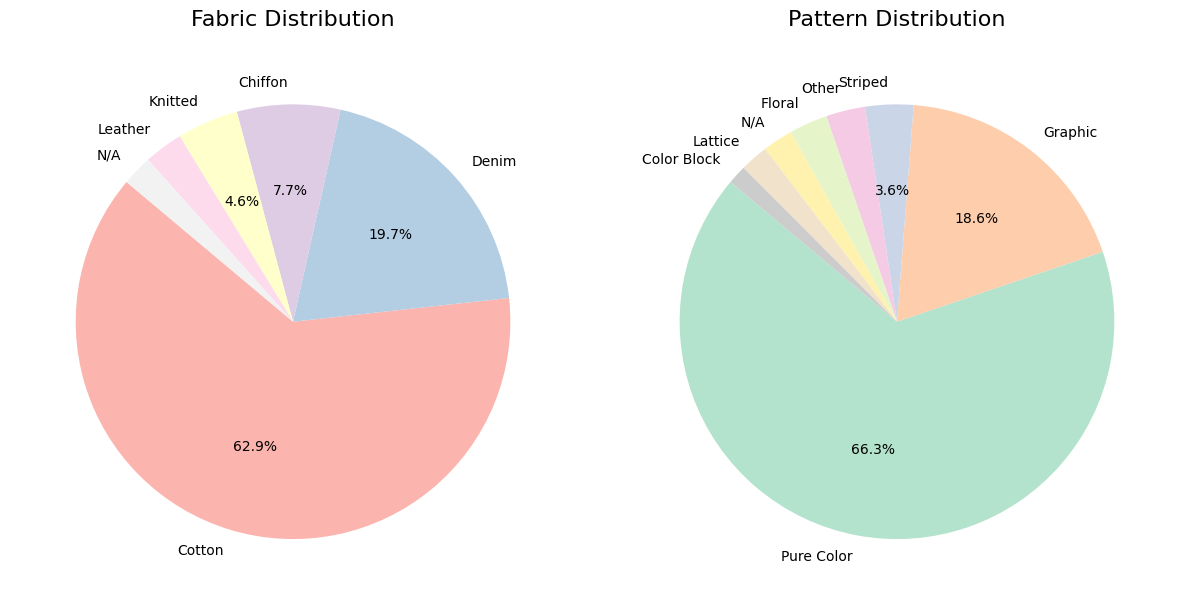

In [35]:
fabric_counts = df['fabric'].value_counts()
pattern_counts = df['pattern'].value_counts()

fabric_labels = {0: 'Denim', 1: 'Cotton', 2: 'Leather', 3: 'Knitted', 4: 'Chiffon', 5: 'N/A'}
pattern_labels = {0: 'Floral', 1: 'Graphic', 2: 'Striped', 3: 'Pure Color', 4: 'Lattice', 5: 'Other', 6: 'Color Block', 7: 'N/A'}

def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct > 3 else ''

fabric_colors = plt.cm.Pastel1(np.linspace(0, 1, len(fabric_counts)))
pattern_colors = plt.cm.Pastel2(np.linspace(0, 1, len(pattern_counts)))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(fabric_counts, labels=[fabric_labels[label] for label in fabric_counts.index], autopct=my_autopct, startangle=140, textprops={'fontsize': 10}, colors=fabric_colors)
axes[0].set_title('Fabric Distribution', y=1.05, fontsize=16)

axes[1].pie(pattern_counts, labels=[pattern_labels[label] for label in pattern_counts.index], autopct=my_autopct, startangle=140, textprops={'fontsize': 10}, colors=pattern_colors)
axes[1].set_title('Pattern Distribution', y=1.05, fontsize=16)

axes[0].axis('equal')
axes[1].axis('equal')
plt.tight_layout()
plt.show()